# Import Libraries


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Data Ingestion

In [16]:
df=pd.read_csv(r'C:\Users\dsai9\Projects\Avalanche Prediction\data\avalanche_prediction.csv').copy()
df.iloc[:,1:].head()

,SnowPack Depth,Snow Density,Slope Angle,Temperature Gradient,Snowfall Intensity,Avalanche
0,143.635030,0.174053,26.542642,0.017270,5.719959,0
1,287.678577,0.316760,26.174470,0.029668,8.054323,1
2,232.998485,0.449178,42.656365,-0.024953,7.601609,1
3,199.664621,0.392890,26.238655,0.012487,1.538999,1
4,89.004660,0.422624,26.798743,0.007175,1.492495,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   SnowPack Depth        1000 non-null   float64
 2   Snow Density          1000 non-null   float64
 3   Slope Angle           1000 non-null   float64
 4   Temperature Gradient  1000 non-null   float64
 5   Snowfall Intensity    1000 non-null   float64
 6   Avalanche             1000 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


# EDA

<Axes: >

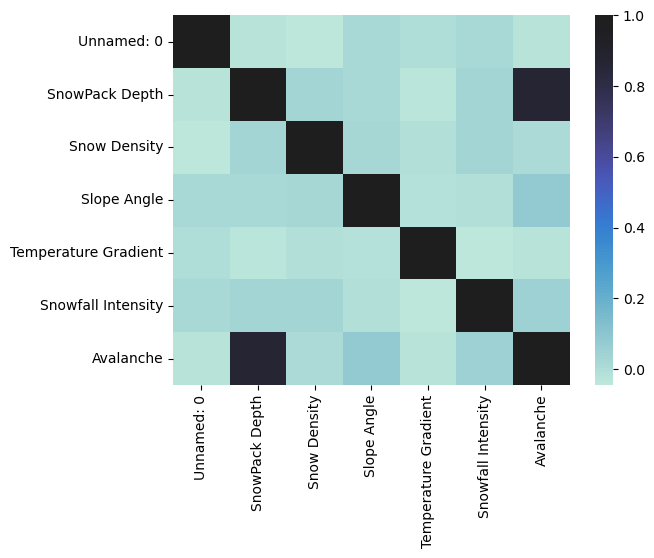

In [18]:
sns.heatmap(df.corr(),center=1)

# Model Building

### Split the data

In [19]:
X=df.drop('Avalanche',axis=1).iloc[:,1:]
y=df['Avalanche']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [20]:
print(X.info,y.info)

<bound method DataFrame.info of      SnowPack Depth  Snow Density  Slope Angle  Temperature Gradient  \
0        143.635030      0.174053    26.542642              0.017270   
1        287.678577      0.316760    26.174470              0.029668   
2        232.998485      0.449178    42.656365             -0.024953   
3        199.664621      0.392890    26.238655              0.012487   
4         89.004660      0.422624    26.798743              0.007175   
..              ...           ...          ...                   ...   
995       72.895518      0.362782    41.632394             -0.005789   
996      279.328394      0.482646    23.931830             -0.016560   
997       84.204658      0.127583    27.744696             -0.010543   
998      287.559338      0.122822    27.251138              0.002994   
999      161.501443      0.212875    41.785351             -0.033863   

     Snowfall Intensity  
0              5.719959  
1              8.054323  
2              7.601609  

## Run the classifier

In [21]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

In [22]:
# Evaluate the model
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9933333333333333


### Save the model


In [23]:
# Save the trained model using pickle
with open(r'C:\Users\dsai9\Projects\Avalanche Prediction\model\random_forest_classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Let's use model

In [24]:
with open(r'C:\Users\dsai9\Projects\Avalanche Prediction\model\random_forest_classifier.pkl', 'rb') as f:
    model=pickle.load(f)
    
    

In [27]:
input_data=[[143.63502971184062,0.17405317153544786,26.54264209339765,0.017270299420889798,5.719958782835928]]
prediction=model.predict(input_data)

c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
prediction[0]

0